In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df_inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
df_train_flagged = pd.read_csv("Train-1542865627584.csv")

In [2]:
df_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


# Cleaning & Structuring Inpatient data

In [3]:
df_inpatient.shape

(40474, 30)

In [4]:
df_inpatient["ClaimID"].nunique()

40474

In [5]:
##converting date columns in datetime formate
df_inpatient.ClaimStartDt = pd.to_datetime(df_inpatient.ClaimStartDt)
df_inpatient.ClaimEndDt = pd.to_datetime(df_inpatient.ClaimEndDt)
df_inpatient.AdmissionDt = pd.to_datetime(df_inpatient.AdmissionDt)
df_inpatient.DischargeDt = pd.to_datetime(df_inpatient.DischargeDt)
df_inpatient.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

In [6]:
##creating claim_duration and hospitalisation_duration columns in intiger and then dropping claim columns
df_inpatient["claim_duration"] = df_inpatient.ClaimEndDt - df_inpatient.ClaimStartDt
df_inpatient["hospitalisation_duration"] = df_inpatient.DischargeDt - df_inpatient.AdmissionDt
df_inpatient["claim_duration"] = df_inpatient["claim_duration"].dt.days
df_inpatient["hospitalisation_duration"] = df_inpatient["hospitalisation_duration"].dt.days
df_inpatient = df_inpatient.drop(["ClaimStartDt", "ClaimEndDt", "AdmissionDt", "DischargeDt"], axis=1)
df_inpatient

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_duration,hospitalisation_duration
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,PRV53671,7000,PHY345332,PHY319565,NaN,2859,1068.0,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN,4,4
40470,BENE159175,CLM74504,PRV54981,4000,PHY342806,PHY365497,NaN,79902,1068.0,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN,3,3
40471,BENE159177,CLM76485,PRV56588,3000,PHY423220,PHY332752,NaN,78605,1068.0,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,4,4
40472,BENE159177,CLM79949,PRV56575,5000,PHY353156,NaN,NaN,7802,1068.0,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [7]:
##creating AttendingPhysician_binary, OperatingPhysician_binary, OtherPhysician_binary and physician_count
df_inpatient['AttendingPhysician_binary'] = df_inpatient['AttendingPhysician'].notnull().astype(int)
df_inpatient['OperatingPhysician_binary'] = df_inpatient['OperatingPhysician'].notnull().astype(int)
df_inpatient['OtherPhysician_binary'] = df_inpatient['OtherPhysician'].notnull().astype(int)
df_inpatient["physician_count"] = df_inpatient['AttendingPhysician_binary']+df_inpatient['OperatingPhysician_binary']+df_inpatient['OtherPhysician_binary']
df_inpatient

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,1,0,0,1
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,2,1,1,0,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,0,1,2
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,8,1,1,1,3
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,17,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,PRV53671,7000,PHY345332,PHY319565,NaN,2859,1068.0,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN,4,4,1,1,0,2
40470,BENE159175,CLM74504,PRV54981,4000,PHY342806,PHY365497,NaN,79902,1068.0,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN,3,3,1,1,0,2
40471,BENE159177,CLM76485,PRV56588,3000,PHY423220,PHY332752,NaN,78605,1068.0,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,4,4,1,1,0,2
40472,BENE159177,CLM79949,PRV56575,5000,PHY353156,NaN,NaN,7802,1068.0,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,1


In [8]:
##creating ClmDiagnosisCode, ClmProcedureCode and Physician dataframe and puting ClaimID on index
ClmDiagnosisCode = df_inpatient[['ClaimID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']]
ClmProcedureCode = df_inpatient[['ClaimID','ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']]

Physician = df_inpatient[["ClaimID","AttendingPhysician","OperatingPhysician","OtherPhysician"]]

ClmDiagnosisCode = ClmDiagnosisCode.set_index("ClaimID")
ClmProcedureCode = ClmProcedureCode.set_index("ClaimID")
Physician = Physician.set_index("ClaimID")


In [9]:
##checking length of all unique ClmProcedureCodes
l1= list(ClmDiagnosisCode['ClmDiagnosisCode_1'].unique())
l2= list(ClmDiagnosisCode['ClmDiagnosisCode_2'].unique())
l3= list(ClmDiagnosisCode['ClmDiagnosisCode_3'].unique())
l4= list(ClmDiagnosisCode['ClmDiagnosisCode_4'].unique())
l5= list(ClmDiagnosisCode['ClmDiagnosisCode_5'].unique())
l6= list(ClmDiagnosisCode['ClmDiagnosisCode_6'].unique())
l7= list(ClmDiagnosisCode['ClmDiagnosisCode_7'].unique())
l8= list(ClmDiagnosisCode['ClmDiagnosisCode_8'].unique())
l9= list(ClmDiagnosisCode['ClmDiagnosisCode_9'].unique())
l10= list(ClmDiagnosisCode['ClmDiagnosisCode_10'].unique())

l = l1+l2+l3+l4+l5+l6+l7+l8+l9+l10

l_unique = list(set(l))

#print(len(l))
print(len(l_unique))

4717


In [10]:
##checking length of all unique ClmProcedureCodes
l1= list(ClmProcedureCode['ClmProcedureCode_1'].unique())
l2= list(ClmProcedureCode['ClmProcedureCode_2'].unique())
l3= list(ClmProcedureCode['ClmProcedureCode_3'].unique())
l4= list(ClmProcedureCode['ClmProcedureCode_4'].unique())
l5= list(ClmProcedureCode['ClmProcedureCode_5'].unique())
l6= list(ClmProcedureCode['ClmProcedureCode_6'].unique())
l = l1+l2+l3+l4+l5+l6
l_unique = list(set(l))
#print(len(l))
print(len(l_unique))

1327


In [11]:
##checking length of all unique physician
l1= list(Physician['AttendingPhysician'].unique())
l2= list(Physician['OperatingPhysician'].unique())
l3= list(Physician['OtherPhysician'].unique())
l = l1+l2+l3
l_unique = list(set(l))
#print(len(l))
print(len(l_unique))

18257


## Dealing with  ClmDiagnosisCodes (one-hot encoding)

In [12]:
#one hot encoding of all ClmDiagnosisCode columns and creating a list of those dataframes
ClmDiagnosisCode_ClmDiagnosisCode_1 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_1'])
ClmDiagnosisCode_ClmDiagnosisCode_2 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_2'])
ClmDiagnosisCode_ClmDiagnosisCode_3 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_3'])
ClmDiagnosisCode_ClmDiagnosisCode_4 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_4'])
ClmDiagnosisCode_ClmDiagnosisCode_5 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_5'])
ClmDiagnosisCode_ClmDiagnosisCode_6 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_6'])
ClmDiagnosisCode_ClmDiagnosisCode_7 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_7'])
ClmDiagnosisCode_ClmDiagnosisCode_8 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_8'])
ClmDiagnosisCode_ClmDiagnosisCode_9 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_9'])
ClmDiagnosisCode_ClmDiagnosisCode_10 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_10'])

file_list = [ClmDiagnosisCode_ClmDiagnosisCode_1,ClmDiagnosisCode_ClmDiagnosisCode_2,ClmDiagnosisCode_ClmDiagnosisCode_3,ClmDiagnosisCode_ClmDiagnosisCode_4,ClmDiagnosisCode_ClmDiagnosisCode_5,ClmDiagnosisCode_ClmDiagnosisCode_6,ClmDiagnosisCode_ClmDiagnosisCode_7,ClmDiagnosisCode_ClmDiagnosisCode_8,ClmDiagnosisCode_ClmDiagnosisCode_9,ClmDiagnosisCode_ClmDiagnosisCode_10]

In [13]:
##one hot encoding of all ClmDiagnosisCodes
ClmDiagnosisCode_onehot_full = pd.DataFrame()
for file in file_list:
    column_list = file.columns.values.tolist()
    ClmDiagnosisCode_onehot_full_columns = ClmDiagnosisCode_onehot_full.columns.values.tolist()
    for column in column_list:
        if column in ClmDiagnosisCode_onehot_full_columns:
            ClmDiagnosisCode_onehot_full[column] = ClmDiagnosisCode_onehot_full[column]+file[column]
        else:
            ClmDiagnosisCode_onehot_full[column] = file[column]

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/2199567307.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ClmDiagnosisCode_onehot_full[column] = file[column]


<AxesSubplot:>

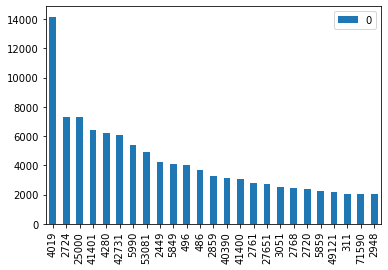

In [14]:
#column wise sum of encoded ClmDiagnosisCodes, sorting, ploting a graph of top 25
ClmDiagnosisCode_onehot_full_axis_sum = pd.DataFrame(ClmDiagnosisCode_onehot_full.sum(axis=0).sort_values(ascending=False))
ClmDiagnosisCode_onehot_full_axis_sum.head(25).plot.bar()

In [15]:
#labeling data fidning potential fraud claims then removing the flags
df_inpatient_flaged_full = df_inpatient.merge(df_train_flagged, on="Provider", how="inner")
df_inpatient_flaged_full = df_inpatient_flaged_full.set_index("ClaimID")
ClmDiagnosisCode_onehot_flagged = pd.merge(df_inpatient_flaged_full["PotentialFraud"], ClmDiagnosisCode_onehot_full, left_index=True, right_index=True)
ClmDiagnosisCode_onehot_flagged_yes = pd.merge(df_inpatient_flaged_full[df_inpatient_flaged_full["PotentialFraud"]=="Yes"]["PotentialFraud"], ClmDiagnosisCode_onehot_full, left_index=True, right_index=True)
ClmDiagnosisCode_onehot_flagged_yes = ClmDiagnosisCode_onehot_flagged_yes.iloc[:,1:]

In [16]:
##column wise sum of flagged encoded ClmDiagnosisCodes and sorting
ClmDiagnosisCode_onehot_yes_axis_sum = pd.DataFrame(ClmDiagnosisCode_onehot_flagged_yes.sum(axis=0).sort_values(ascending=False))

In [17]:
#creating list of unique top ClmDiagnosisCodes present in both flagged and unflagged data
list_of_top25_ClmDiagnosisCode = ClmDiagnosisCode_onehot_full_axis_sum.index.values.tolist()[:25]
list_of_top25_ClmDiagnosisCode_yes = ClmDiagnosisCode_onehot_yes_axis_sum.index.values.tolist()[:25]
list_of_both_top25_ClmDiagnosisCode = list_of_top25_ClmDiagnosisCode+list_of_top25_ClmDiagnosisCode_yes
list_of_both_top25_ClmDiagnosisCode = list(set(list_of_both_top25_ClmDiagnosisCode))

In [18]:
#finally creating encoded data with a other sum columns and add a prefix to column names
ClmDiagnosisCode_onehot = ClmDiagnosisCode_onehot_flagged[list_of_both_top25_ClmDiagnosisCode]
sum_of_other_ClmDiagnosis = ClmDiagnosisCode_onehot_flagged.drop(list_of_both_top25_ClmDiagnosisCode, axis = 1).sum(axis=1)
ClmDiagnosisCode_onehot['sum_diagnosis'] = sum_of_other_ClmDiagnosis
ClmDiagnosisCode_onehot = ClmDiagnosisCode_onehot.add_prefix("Diagnosis_")
ClmDiagnosisCode_onehot

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/3174640428.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_of_other_ClmDiagnosis = ClmDiagnosisCode_onehot_flagged.drop(list_of_both_top25_ClmDiagnosisCode, axis = 1).sum(axis=1)
C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/3174640428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClmDiagnosisCode_onehot['sum_diagnosis'] = sum_of_other_ClmDiagnosis


,Diagnosis_2449,Diagnosis_5859,Diagnosis_71590,Diagnosis_4280,Diagnosis_496,Diagnosis_2859,Diagnosis_2720,Diagnosis_2761,Diagnosis_25000,Diagnosis_42731,Diagnosis_486,Diagnosis_311,Diagnosis_4019,Diagnosis_5990,Diagnosis_53081,Diagnosis_2948,Diagnosis_5849,Diagnosis_3051,Diagnosis_2724,Diagnosis_49121,Diagnosis_27651,Diagnosis_41401,Diagnosis_2768,Diagnosis_41400,Diagnosis_40390,Diagnosis_sum_diagnosis
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,4
CLM34721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,7
CLM72336,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8
CLM73394,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4
CLM32911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM57017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7
CLM67045,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,4
CLM76036,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [19]:
#dropping old ClmDiagnosisCode columns and merging new encoded ClmDiagnosisCode data with df_inpatient data
df_inpatient_codes_dropped = df_inpatient.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10'],axis=1)
df_inpatient_codes_dropped = df_inpatient_codes_dropped.set_index("ClaimID")
inpatient_onehot = pd.merge(df_inpatient_codes_dropped, ClmDiagnosisCode_onehot, left_index=True, right_index=True)
inpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_2449,Diagnosis_5859,Diagnosis_71590,Diagnosis_4280,Diagnosis_496,Diagnosis_2859,Diagnosis_2720,Diagnosis_2761,Diagnosis_25000,Diagnosis_42731,Diagnosis_486,Diagnosis_311,Diagnosis_4019,Diagnosis_5990,Diagnosis_53081,Diagnosis_2948,Diagnosis_5849,Diagnosis_3051,Diagnosis_2724,Diagnosis_49121,Diagnosis_27651,Diagnosis_41401,Diagnosis_2768,Diagnosis_41400,Diagnosis_40390,Diagnosis_sum_diagnosis
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,NaN,NaN,NaN,NaN,NaN,NaN,6,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,4
CLM66048,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,7092.0,NaN,NaN,NaN,NaN,NaN,2,2,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
CLM68358,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
CLM38412,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,331.0,NaN,NaN,NaN,NaN,NaN,8,8,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,7
CLM63689,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,3893.0,NaN,NaN,NaN,NaN,NaN,17,17,1,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM69886,BENE159167,PRV53671,7000,PHY345332,PHY319565,NaN,2859,1068.0,812,9904.0,NaN,NaN,NaN,NaN,NaN,4,4,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
CLM74504,BENE159175,PRV54981,4000,PHY342806,PHY365497,NaN,79902,1068.0,228,8605.0,NaN,NaN,NaN,NaN,NaN,3,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,7
CLM76485,BENE159177,PRV56588,3000,PHY423220,PHY332752,NaN,78605,1068.0,302,9390.0,NaN,NaN,NaN,NaN,NaN,4,4,1,1,0,2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4


## Dealing with ClmProcedureCode (one-hot encoding)

In [20]:
#one hot encoding of all ClmProcedureCode columns and creating a list of those dataframes
ClmProcedureCode_ClmProcedureCode_1 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_1'])
ClmProcedureCode_ClmProcedureCode_2 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_2'])
ClmProcedureCode_ClmProcedureCode_3 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_3'])
ClmProcedureCode_ClmProcedureCode_4 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_4'])
ClmProcedureCode_ClmProcedureCode_5 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_5'])
ClmProcedureCode_ClmProcedureCode_6 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_6'])

file_list = [ClmProcedureCode_ClmProcedureCode_1,ClmProcedureCode_ClmProcedureCode_2,ClmProcedureCode_ClmProcedureCode_3,ClmProcedureCode_ClmProcedureCode_4,ClmProcedureCode_ClmProcedureCode_5,ClmProcedureCode_ClmProcedureCode_6]

In [21]:
##one hot encoding of all ClmProcedureCode
ClmProcedureCode_onehot_full = pd.DataFrame()
for file in file_list:
    column_list = file.columns.values.tolist()
    ClmProcedureCode_onehot_full_columns = ClmProcedureCode_onehot_full.columns.values.tolist()
    for column in column_list:
        if column in ClmProcedureCode_onehot_full_columns:
            ClmProcedureCode_onehot_full[column] = ClmProcedureCode_onehot_full[column]+file[column]
        else:
            ClmProcedureCode_onehot_full[column] = file[column]

ClmProcedureCode_onehot_full

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/3854348494.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ClmProcedureCode_onehot_full[column] = file[column]


,11.0,13.0,14.0,15.0,17.0,22.0,34.0,36.0,40.0,50.0,51.0,52.0,53.0,54.0,61.0,62.0,64.0,66.0,70.0,71.0,72.0,73.0,80.0,81.0,82.0,83.0,84.0,113.0,114.0,115.0,122.0,123.0,124.0,125.0,131.0,139.0,151.0,153.0,159.0,184.0,202.0,206.0,212.0,214.0,234.0,239.0,242.0,251.0,252.0,270.0,280.0,282.0,287.0,293.0,294.0,296.0,301.0,302.0,303.0,304.0,309.0,310.0,311.0,315.0,329.0,331.0,339.0,341.0,343.0,344.0,346.0,353.0,359.0,370.0,387.0,390.0,391.0,392.0,393.0,394.0,397.0,398.0,400.0,401.0,403.0,407.0,409.0,415.0,427.0,430.0,435.0,436.0,437.0,441.0,449.0,481.0,492.0,493.0,500.0,503.0,523.0,527.0,531.0,532.0,539.0,540.0,543.0,544.0,554.0,560.0,561.0,562.0,570.0,576.0,585.0,586.0,594.0,595.0,598.0,603.0,604.0,605.0,609.0,610.0,611.0,623.0,631.0,639.0,643.0,652.0,681.0,688.0,689.0,691.0,704.0,711.0,715.0,722.0,734.0,740.0,741.0,762.0,780.0,806.0,835.0,843.0,844.0,850.0,863.0,864.0,881.0,889.0,966.0,1454.0,1474.0,1519.0,1601.0,1629.0,1682.0,1711.0,1712.0,1713.0,1732.0,1733.0,1734.0,1735.0,1736.0,1739.0,1811.0,1879.0,2001.0,2042.0,2079.0,2101.0,2102.0,2103.0,2121.0,2171.0,2172.0,2181.0,2188.0,2189.0,2219.0,2242.0,2252.0,2262.0,2263.0,2309.0,2319.0,2501.0,2502.0,2621.0,2631.0,2724.0,2732.0,2743.0,2751.0,2759.0,2762.0,2911.0,2912.0,2931.0,2932.0,2951.0,3121.0,3129.0,3142.0,3173.0,3174.0,3179.0,3199.0,3220.0,3224.0,3229.0,3230.0,3239.0,3241.0,3249.0,3259.0,3320.0,3321.0,3322.0,3323.0,3324.0,3326.0,3327.0,3328.0,3332.0,3339.0,3351.0,3352.0,3401.0,3402.0,3403.0,3404.0,3405.0,3406.0,3409.0,3420.0,3421.0,3422.0,3423.0,3424.0,3425.0,3451.0,3452.0,3459.0,3479.0,3482.0,3491.0,...,9749.0,9751.0,9761.0,9762.0,9764.0,9784.0,9787.0,9789.0,9805.0,9815.0,9851.0,9903.0,9904.0,9905.0,9906.0,9907.0,9910.0,9914.0,9915.0,9917.0,9918.0,9919.0,9920.0,9921.0,9922.0,9923.0,9925.0,9926.0,9928.0,9929.0,9938.0,9939.0,9952.0,9955.0,9959.0,9960.0,9961.0,9962.0,9969.0,9971.0,9972.0,9978.0,9979.0,9984.0,9992.0,9999.0,42.0,59.0,90.0,185.0,193.0,260.0,412.0,496.0,529.0,842.0,920.0,1121.0,1122.0,1160.0,1173.0,1175.0,1179.0,1390.0,1453.0,1509.0,1623.0,1749.0,1809.0,2182.0,2251.0,2630.0,2721.0,2722.0,2729.0,2749.0,2752.0,2753.0,2761.0,2763.0,2764.0,2769.0,2771.0,2819.0,2899.0,2939.0,3009.0,3209.0,3331.0,3341.0,3371.0,3481.0,3484.0,3485.0,3501.0,3542.0,3561.0,3570.0,3572.0,3619.0,3810.0,3811.0,3840.0,3842.0,3849.0,3962.0,3963.0,4101.0,4102.0,4109.0,4139.0,4142.0,4210.0,4241.0,4251.0,4254.0,4258.0,4262.0,4263.0,4264.0,4269.0,4400.0,4465.0,4550.0,4552.0,4590.0,4660.0,4821.0,4829.0,4871.0,4959.0,5119.0,5121.0,5163.0,5183.0,5194.0,5521.0,5531.0,5582.0,5589.0,5679.0,5691.0,5693.0,5695.0,5712.0,5722.0,5821.0,5829.0,5831.0,5845.0,5849.0,5902.0,5921.0,6019.0,6071.0,6141.0,6191.0,6212.0,6219.0,6821.0,6822.0,6823.0,6829.0,6929.0,7032.0,7062.0,7071.0,7101.0,7231.0,7271.0,7533.0,7801.0,7802.0,7804.0,7806.0,7808.0,7810.0,7812.0,7820.0,7822.0,7823.0,7824.0,7830.0,7840.0,7843.0,7845.0,7847.0,7850.0,7851.0,7856.0,7871.0,7873.0,7876.0,7881.0,7885.0,7891.0,7892.0,7910.0,7919.0,7921.0,7960.0,7963.0,7991.0,7993.0,7994.0,7999.0,8020.0,8026.0,8052.0,8054.0,8072.0,8082.0,8404.0,8448.0,8708.0,8881.0,8921.0,9012.0,9052.0,9054.0,9064.0,9065.0,9072.0,9092.0,9112.0,9181.0,9222.0,9331.0,9642.0,9916.0,9973.0,9974.0,9975.0,9982.0,9986.0,9995.0,9998.0,1622.0,2411.0,2592.0,2811.0,4299.0,4431.0,4532.0,5193.0,5283.0,7942.0,9172.0,1511.0,3343.0
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<AxesSubplot:>

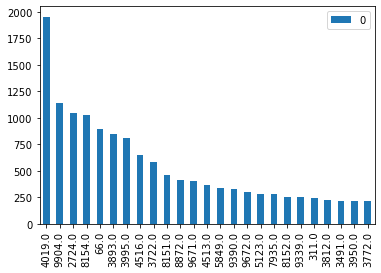

In [22]:
#column wise sum of encoded ClmProcedureCode, sorting, ploting a graph of top 25
ClmProcedureCode_onehot_full_axis_sum = pd.DataFrame(ClmProcedureCode_onehot_full.sum(axis=0).sort_values(ascending=False))
ClmProcedureCode_onehot_full_axis_sum.head(25).plot.bar()

In [23]:
#labeling data fidning potential fraud claims then removing the flags
df_inpatient_flaged_full = df_inpatient.merge(df_train_flagged, on="Provider", how="inner")
df_inpatient_flaged_full = df_inpatient_flaged_full.set_index("ClaimID")
ClmProcedureCode_onehot_flagged = pd.merge(df_inpatient_flaged_full["PotentialFraud"], ClmProcedureCode_onehot_full, left_index=True, right_index=True)
ClmProcedureCode_onehot_flagged_yes = pd.merge(df_inpatient_flaged_full[df_inpatient_flaged_full["PotentialFraud"]=="Yes"]["PotentialFraud"], ClmProcedureCode_onehot_full, left_index=True, right_index=True)
ClmProcedureCode_onehot_flagged_yes = ClmProcedureCode_onehot_flagged_yes.iloc[:,1:]

In [24]:
##column wise sum of flagged encoded ClmProcedureCode and sorting
ClmProcedureCode_onehot_yes_axis_sum = pd.DataFrame(ClmProcedureCode_onehot_flagged_yes.sum(axis=0).sort_values(ascending=False))

In [25]:
#creating list of unique top ClmProcedureCode present in both flagged and unflagged data
list_of_top25_ClmProcedureCode = ClmProcedureCode_onehot_full_axis_sum.index.values.tolist()[:25]
list_of_top25_ClmProcedureCode_yes = ClmProcedureCode_onehot_yes_axis_sum.index.values.tolist()[:25]
list_of_both_top25_ClmProcedureCode = list_of_top25_ClmProcedureCode+list_of_top25_ClmProcedureCode_yes
list_of_both_top25_ClmProcedureCode = list(set(list_of_both_top25_ClmProcedureCode))

In [26]:
#finally creating encoded data with a other sum columns and add a prefix to column names
ClmProcedureCode_onehot = ClmProcedureCode_onehot_flagged[list_of_both_top25_ClmProcedureCode]
sum_of_other_ClmProcedureCode = ClmProcedureCode_onehot_flagged.drop(list_of_both_top25_ClmProcedureCode, axis = 1).sum(axis=1)
ClmProcedureCode_onehot['sum_procedure'] = sum_of_other_ClmProcedureCode
ClmProcedureCode_onehot = ClmProcedureCode_onehot.add_prefix("Procedure_")
ClmProcedureCode_onehot

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/1092339453.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_of_other_ClmProcedureCode = ClmProcedureCode_onehot_flagged.drop(list_of_both_top25_ClmProcedureCode, axis = 1).sum(axis=1)
C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/1092339453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClmProcedureCode_onehot['sum_procedure'] = sum_of_other_ClmProcedureCode


,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM34721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLM72336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM73394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
CLM32911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM57017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM67045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM76036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#dropping old ClmProcedureCode columns and merging new encoded ClmProcedureCode data with inpatient_onehot data
inpatient_onehot = inpatient_onehot.drop(['ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],axis=1)
inpatient_onehot = pd.merge(inpatient_onehot, ClmProcedureCode_onehot, left_index=True, right_index=True)
inpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_2449,Diagnosis_5859,Diagnosis_71590,Diagnosis_4280,Diagnosis_496,Diagnosis_2859,Diagnosis_2720,Diagnosis_2761,Diagnosis_25000,Diagnosis_42731,Diagnosis_486,Diagnosis_311,Diagnosis_4019,Diagnosis_5990,Diagnosis_53081,Diagnosis_2948,Diagnosis_5849,Diagnosis_3051,Diagnosis_2724,Diagnosis_49121,Diagnosis_27651,Diagnosis_41401,Diagnosis_2768,Diagnosis_41400,Diagnosis_40390,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,6,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM66048,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,2,2,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM68358,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,3,3,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM38412,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,8,8,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM63689,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,17,17,1,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM69886,BENE159167,PRV53671,7000,PHY345332,PHY319565,NaN,2859,1068.0,812,4,4,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM74504,BENE159175,PRV54981,4000,PHY342806,PHY365497,NaN,79902,1068.0,228,3,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM76485,BENE159177,PRV56588,3000,PHY423220,PHY332752,NaN,78605,1068.0,302,4,4,1,1,0,2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dealing with Physician (one-hot encoding)

In [28]:
#one hot encoding of all Physician columns and creating a list of those dataframes
Physician_AttendingPhysician = pd.get_dummies(Physician['AttendingPhysician'])
Physician_OperatingPhysician = pd.get_dummies(Physician['OperatingPhysician'])
Physician_OtherPhysician = pd.get_dummies(Physician['OtherPhysician'])

file_list = [Physician_AttendingPhysician,Physician_OperatingPhysician,Physician_OtherPhysician]

In [29]:
##one hot encoding of all Physician
Physician_onehot_full = pd.DataFrame()
for file in file_list:
    column_list = file.columns.values.tolist()
    Physician_onehot_full_columns = Physician_onehot_full.columns.values.tolist()
    for column in column_list:
        if column in Physician_onehot_full_columns:
            Physician_onehot_full[column] = Physician_onehot_full[column]+file[column]
        else:
            Physician_onehot_full[column] = file[column]

Physician_onehot_full

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/1161913413.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Physician_onehot_full[column] = file[column]


,PHY311002,PHY311023,PHY311028,PHY311035,PHY311056,PHY311071,PHY311082,PHY311106,PHY311128,PHY311138,PHY311147,PHY311162,PHY311166,PHY311170,PHY311182,PHY311195,PHY311206,PHY311207,PHY311217,PHY311223,PHY311262,PHY311276,PHY311280,PHY311309,PHY311311,PHY311314,PHY311325,PHY311333,PHY311351,PHY311396,PHY311401,PHY311435,PHY311440,PHY311447,PHY311461,PHY311469,PHY311470,PHY311473,PHY311486,PHY311500,PHY311502,PHY311503,PHY311505,PHY311506,PHY311510,PHY311527,PHY311540,PHY311554,PHY311561,PHY311622,PHY311624,PHY311630,PHY311637,PHY311638,PHY311640,PHY311644,PHY311652,PHY311668,PHY311672,PHY311680,PHY311698,PHY311717,PHY311737,PHY311752,PHY311753,PHY311755,PHY311763,PHY311764,PHY311767,PHY311769,PHY311770,PHY311773,PHY311783,PHY311786,PHY311791,PHY311800,PHY311821,PHY311835,PHY311843,PHY311846,PHY311891,PHY311900,PHY311963,PHY311976,PHY311977,PHY311979,PHY311982,PHY311986,PHY311987,PHY312004,PHY312008,PHY312025,PHY312038,PHY312045,PHY312070,PHY312071,PHY312090,PHY312104,PHY312106,PHY312126,PHY312157,PHY312181,PHY312189,PHY312214,PHY312223,PHY312240,PHY312248,PHY312257,PHY312289,PHY312295,PHY312304,PHY312307,PHY312314,PHY312336,PHY312348,PHY312407,PHY312410,PHY312420,PHY312430,PHY312443,PHY312495,PHY312499,PHY312514,PHY312526,PHY312533,PHY312562,PHY312572,PHY312578,PHY312579,PHY312586,PHY312612,PHY312613,PHY312620,PHY312630,PHY312631,PHY312632,PHY312637,PHY312648,PHY312650,PHY312690,PHY312694,PHY312702,PHY312719,PHY312720,PHY312726,PHY312728,PHY312731,PHY312765,PHY312782,PHY312794,PHY312834,PHY312835,PHY312837,PHY312866,PHY312882,PHY312885,PHY312890,PHY312903,PHY312916,PHY312921,PHY312926,PHY312930,PHY312931,PHY312959,PHY312969,PHY312976,PHY312981,PHY312987,PHY312994,PHY313016,PHY313019,PHY313021,PHY313050,PHY313053,PHY313100,PHY313103,PHY313125,PHY313129,PHY313137,PHY313140,PHY313143,PHY313145,PHY313177,PHY313192,PHY313198,PHY313202,PHY313203,PHY313207,PHY313209,PHY313234,PHY313248,PHY313250,PHY313283,PHY313286,PHY313287,PHY313291,PHY313304,PHY313321,PHY313358,PHY313377,PHY313416,PHY313422,PHY313437,PHY313438,PHY313453,PHY313473,PHY313477,PHY313485,PHY313508,PHY313519,PHY313528,PHY313537,PHY313563,PHY313567,PHY313586,PHY313587,PHY313599,PHY313612,PHY313623,PHY313627,PHY313641,PHY313651,PHY313657,PHY313661,PHY313675,PHY313711,PHY313741,PHY313742,PHY313793,PHY313811,PHY313816,PHY313826,PHY313830,PHY313847,PHY313859,PHY313867,PHY313870,PHY313880,PHY313890,PHY313904,PHY313920,PHY313926,PHY313927,PHY313936,PHY313941,PHY313952,PHY313955,PHY313970,PHY313977,PHY313978,...,PHY414000,PHY414052,PHY414430,PHY414443,PHY414507,PHY414531,PHY414592,PHY414764,PHY414877,PHY415081,PHY415272,PHY415310,PHY415437,PHY415628,PHY415905,PHY416064,PHY416202,PHY416278,PHY416297,PHY416319,PHY416320,PHY416360,PHY416381,PHY416415,PHY416527,PHY416603,PHY416746,PHY416758,PHY416781,PHY416873,PHY416978,PHY417018,PHY417025,PHY417026,PHY417039,PHY417127,PHY417279,PHY417399,PHY417468,PHY417500,PHY417524,PHY417696,PHY417887,PHY417907,PHY418029,PHY418033,PHY418038,PHY418069,PHY418233,PHY418295,PHY418588,PHY418797,PHY418922,PHY419092,PHY419109,PHY419224,PHY419279,PHY419285,PHY419332,PHY419375,PHY419415,PHY419495,PHY419508,PHY419526,PHY419570,PHY419592,PHY419848,PHY420041,PHY420055,PHY420198,PHY420318,PHY420386,PHY420435,PHY420436,PHY420620,PHY420672,PHY420686,PHY420847,PHY420987,PHY421019,PHY421024,PHY421096,PHY421122,PHY421256,PHY421512,PHY421563,PHY421858,PHY421881,PHY422458,PHY422529,PHY422600,PHY422739,PHY422785,PHY422800,PHY422807,PHY422907,PHY422954,PHY422961,PHY423123,PHY423237,PHY423242,PHY423253,PHY423270,PHY423391,PHY423429,PHY423430,PHY423455,PHY423485,PHY423511,PHY423561,PHY423563,PHY423673,PHY423713,PHY423730,PHY423927,PHY424038,PHY424102,PHY424228,PHY424339,PHY424374,PHY424417,PHY424437,PHY424556,PHY424830,PHY424865,PHY424877,PHY424879,PHY424880,PHY424920,PHY425026,PHY425071,PHY425084,PHY425108,PHY425147,PHY425274,PHY425427,PHY425523,PHY425537,PHY425697,PHY425712,PHY425713,PHY425721,PHY425883,PHY426170,PHY426230,PHY426266,PHY426321,PHY426387,PHY426567,PHY42

<AxesSubplot:>

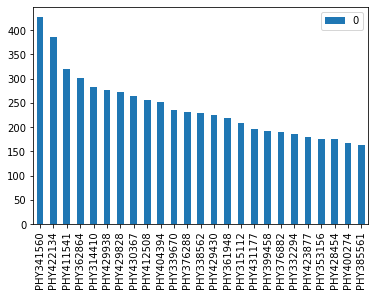

In [30]:
#column wise sum of encoded Physician, sorting, ploting a graph of top 25
Physician_onehot_full_axis_sum = pd.DataFrame(Physician_onehot_full.sum(axis=0).sort_values(ascending=False))
Physician_onehot_full_axis_sum.head(25).plot.bar()

In [31]:
#labeling data fidning potential fraud claims then removing the flags
df_inpatient_flaged_full = df_inpatient.merge(df_train_flagged, on="Provider", how="inner")
df_inpatient_flaged_full = df_inpatient_flaged_full.set_index("ClaimID")
Physician_onehot_flagged = pd.merge(df_inpatient_flaged_full["PotentialFraud"], Physician_onehot_full, left_index=True, right_index=True)
Physician_onehot_flagged_yes = pd.merge(df_inpatient_flaged_full[df_inpatient_flaged_full["PotentialFraud"]=="Yes"]["PotentialFraud"], Physician_onehot_full, left_index=True, right_index=True)
Physician_onehot_flagged_yes = Physician_onehot_flagged_yes.iloc[:,1:]

In [32]:
##column wise sum of flagged encoded Physician and sorting
Physician_onehot_yes_axis_sum = pd.DataFrame(Physician_onehot_flagged_yes.sum(axis=0).sort_values(ascending=False))

In [33]:
#creating list of unique top Physician present in both flagged and unflagged data
list_of_top25_Physician = Physician_onehot_full_axis_sum.index.values.tolist()[:25]
list_of_top25_Physician_yes = Physician_onehot_yes_axis_sum.index.values.tolist()[:25]
list_of_both_top25_Physician = list_of_top25_Physician+list_of_top25_Physician_yes
list_of_both_top25_Physician = list(set(list_of_both_top25_Physician))

In [34]:
#finally creating encoded data with a other sum columns and add a prefix to column names
Physician_onehot = Physician_onehot_flagged[list_of_both_top25_Physician]
sum_of_other_Physician = Physician_onehot_flagged.drop(list_of_both_top25_Physician, axis = 1).sum(axis=1)
Physician_onehot['sum_Physician'] = sum_of_other_Physician
Physician_onehot

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/3981578051.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_of_other_Physician = Physician_onehot_flagged.drop(list_of_both_top25_Physician, axis = 1).sum(axis=1)
C:\Users\MR321NC\AppData\Local\Temp/ipykernel_15920/3981578051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Physician_onehot['sum_Physician'] = sum_of_other_Physician


,PHY429938,PHY314410,PHY431177,PHY428454,PHY341560,PHY400274,PHY404394,PHY385561,PHY429828,PHY376882,PHY430367,PHY353156,PHY338562,PHY362864,PHY411541,PHY361948,PHY376288,PHY412508,PHY422134,PHY423877,PHY429430,PHY339670,PHY332294,PHY315112,PHY399458,PHY396496,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM34721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
CLM72336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM73394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
CLM32911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM57017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
CLM67045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
CLM76036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
#dropping old Physician columns and merging new encoded Physician data with inpatient_onehot data
inpatient_onehot = inpatient_onehot.drop(["AttendingPhysician","OperatingPhysician","OtherPhysician"],axis=1)
inpatient_onehot = pd.merge(inpatient_onehot, Physician_onehot, left_index=True, right_index=True)
inpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_2449,Diagnosis_5859,Diagnosis_71590,Diagnosis_4280,Diagnosis_496,Diagnosis_2859,Diagnosis_2720,Diagnosis_2761,Diagnosis_25000,Diagnosis_42731,Diagnosis_486,Diagnosis_311,Diagnosis_4019,Diagnosis_5990,Diagnosis_53081,Diagnosis_2948,Diagnosis_5849,Diagnosis_3051,Diagnosis_2724,Diagnosis_49121,Diagnosis_27651,Diagnosis_41401,Diagnosis_2768,Diagnosis_41400,Diagnosis_40390,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY429938,PHY314410,PHY431177,PHY428454,PHY341560,PHY400274,PHY404394,PHY385561,PHY429828,PHY376882,PHY430367,PHY353156,PHY338562,PHY362864,PHY411541,PHY361948,PHY376288,PHY412508,PHY422134,PHY423877,PHY429430,PHY339670,PHY332294,PHY315112,PHY399458,PHY396496,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,BENE11001,PRV55912,26000,7866,1068.0,201,6,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM66048,BENE11001,PRV55907,5000,6186,1068.0,750,2,2,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM68358,BENE11001,PRV56046,5000,29590,1068.0,883,3,3,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM38412,BENE11011,PRV52405,5000,431,1068.0,067,8,8,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
CLM63689,BENE11014,PRV56614,10000,78321,1068.0,975,17,17,1,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM69886,BENE159167,PRV53671,7000,2859,1068.0,812,4,4,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM74504,BENE159175,PRV54981,4000,79902,1068.0,228,3,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM76485,BENE159177,PRV56588,3000,78605,1068.0,302,4,4,1,1,0,2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [36]:
#dropping "DiagnosisGroupCode","ClmAdmitDiagnosisCode" columns
inpatient_onehot = inpatient_onehot.drop(["DiagnosisGroupCode","ClmAdmitDiagnosisCode"],axis=1)

In [37]:
inpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_2449,Diagnosis_5859,Diagnosis_71590,Diagnosis_4280,Diagnosis_496,Diagnosis_2859,Diagnosis_2720,Diagnosis_2761,Diagnosis_25000,Diagnosis_42731,Diagnosis_486,Diagnosis_311,Diagnosis_4019,Diagnosis_5990,Diagnosis_53081,Diagnosis_2948,Diagnosis_5849,Diagnosis_3051,Diagnosis_2724,Diagnosis_49121,Diagnosis_27651,Diagnosis_41401,Diagnosis_2768,Diagnosis_41400,Diagnosis_40390,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY429938,PHY314410,PHY431177,PHY428454,PHY341560,PHY400274,PHY404394,PHY385561,PHY429828,PHY376882,PHY430367,PHY353156,PHY338562,PHY362864,PHY411541,PHY361948,PHY376288,PHY412508,PHY422134,PHY423877,PHY429430,PHY339670,PHY332294,PHY315112,PHY399458,PHY396496,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,BENE11001,PRV55912,26000,1068.0,6,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CLM66048,BENE11001,PRV55907,5000,1068.0,2,2,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM68358,BENE11001,PRV56046,5000,1068.0,3,3,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM38412,BENE11011,PRV52405,5000,1068.0,8,8,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
CLM63689,BENE11014,PRV56614,10000,1068.0,17,17,1,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM69886,BENE159167,PRV53671,7000,1068.0,4,4,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM74504,BENE159175,PRV54981,4000,1068.0,3,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CLM76485,BENE159177,PRV56588,3000,1068.0,4,4,1,1,0,2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [38]:
inpatient_onehot.to_csv("inpatient_onehot_cleaned.csv")

In [38]:
inpatient_onehot[["InscClaimAmtReimbursed","DeductibleAmtPaid","claim_duration","hospitalisation_duration","physician_count","Diagnosis_sum_diagnosis", "Procedure_sum_procedure", "sum_Physician"]]

,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_duration,hospitalisation_duration,physician_count,Diagnosis_sum_diagnosis,Procedure_sum_procedure,sum_Physician
ClaimID,,,,,,,,
CLM46614,26000,1068.0,6,6,1,4,0,1
CLM66048,5000,1068.0,2,2,2,2,1,2
CLM68358,5000,1068.0,3,3,2,6,0,2
CLM38412,5000,1068.0,8,8,3,7,1,3
CLM63689,10000,1068.0,17,17,2,7,0,2
...,...,...,...,...,...,...,...,...
CLM69886,7000,1068.0,4,4,2,10,0,2
CLM74504,4000,1068.0,3,3,2,7,1,2
CLM76485,3000,1068.0,4,4,2,4,0,2


C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distribu

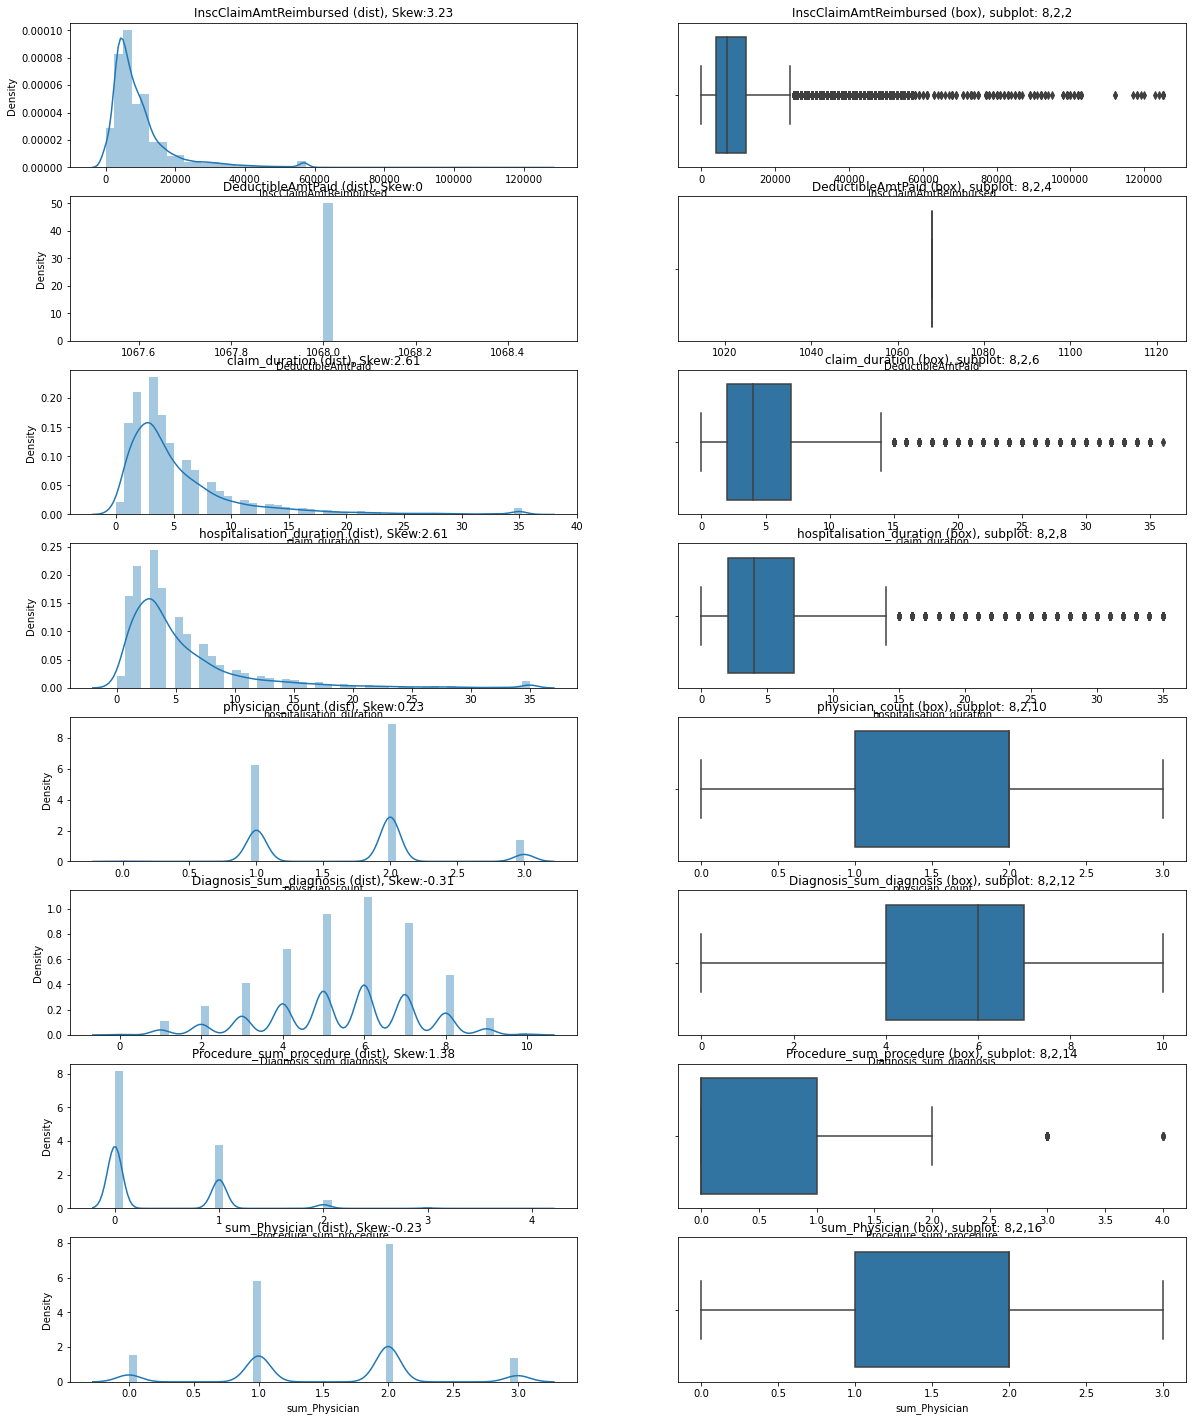

In [40]:
from sklearn.preprocessing import power_transform,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
dff = inpatient_onehot[["InscClaimAmtReimbursed","DeductibleAmtPaid","claim_duration","hospitalisation_duration","physician_count","Diagnosis_sum_diagnosis", "Procedure_sum_procedure", "sum_Physician"]] 
num_cols_ben = ["InscClaimAmtReimbursed","DeductibleAmtPaid","claim_duration","hospitalisation_duration","physician_count","Diagnosis_sum_diagnosis", "Procedure_sum_procedure", "sum_Physician"]
fig = plt.figure(figsize=(20,25))

#  plot Numerical Data
a = len(num_cols_ben)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter


for i in num_cols_ben:
    plt.subplot(a, b, c)
    skew = round(dff[i].skew(),2)
    plt.title('{} (dist), Skew:{}'.format(i, skew))
    plt.xlabel(i)
    sns.distplot(dff[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x = dff[i])
    c = c + 1

C:\Users\MR321NC\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\MR321NC\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.

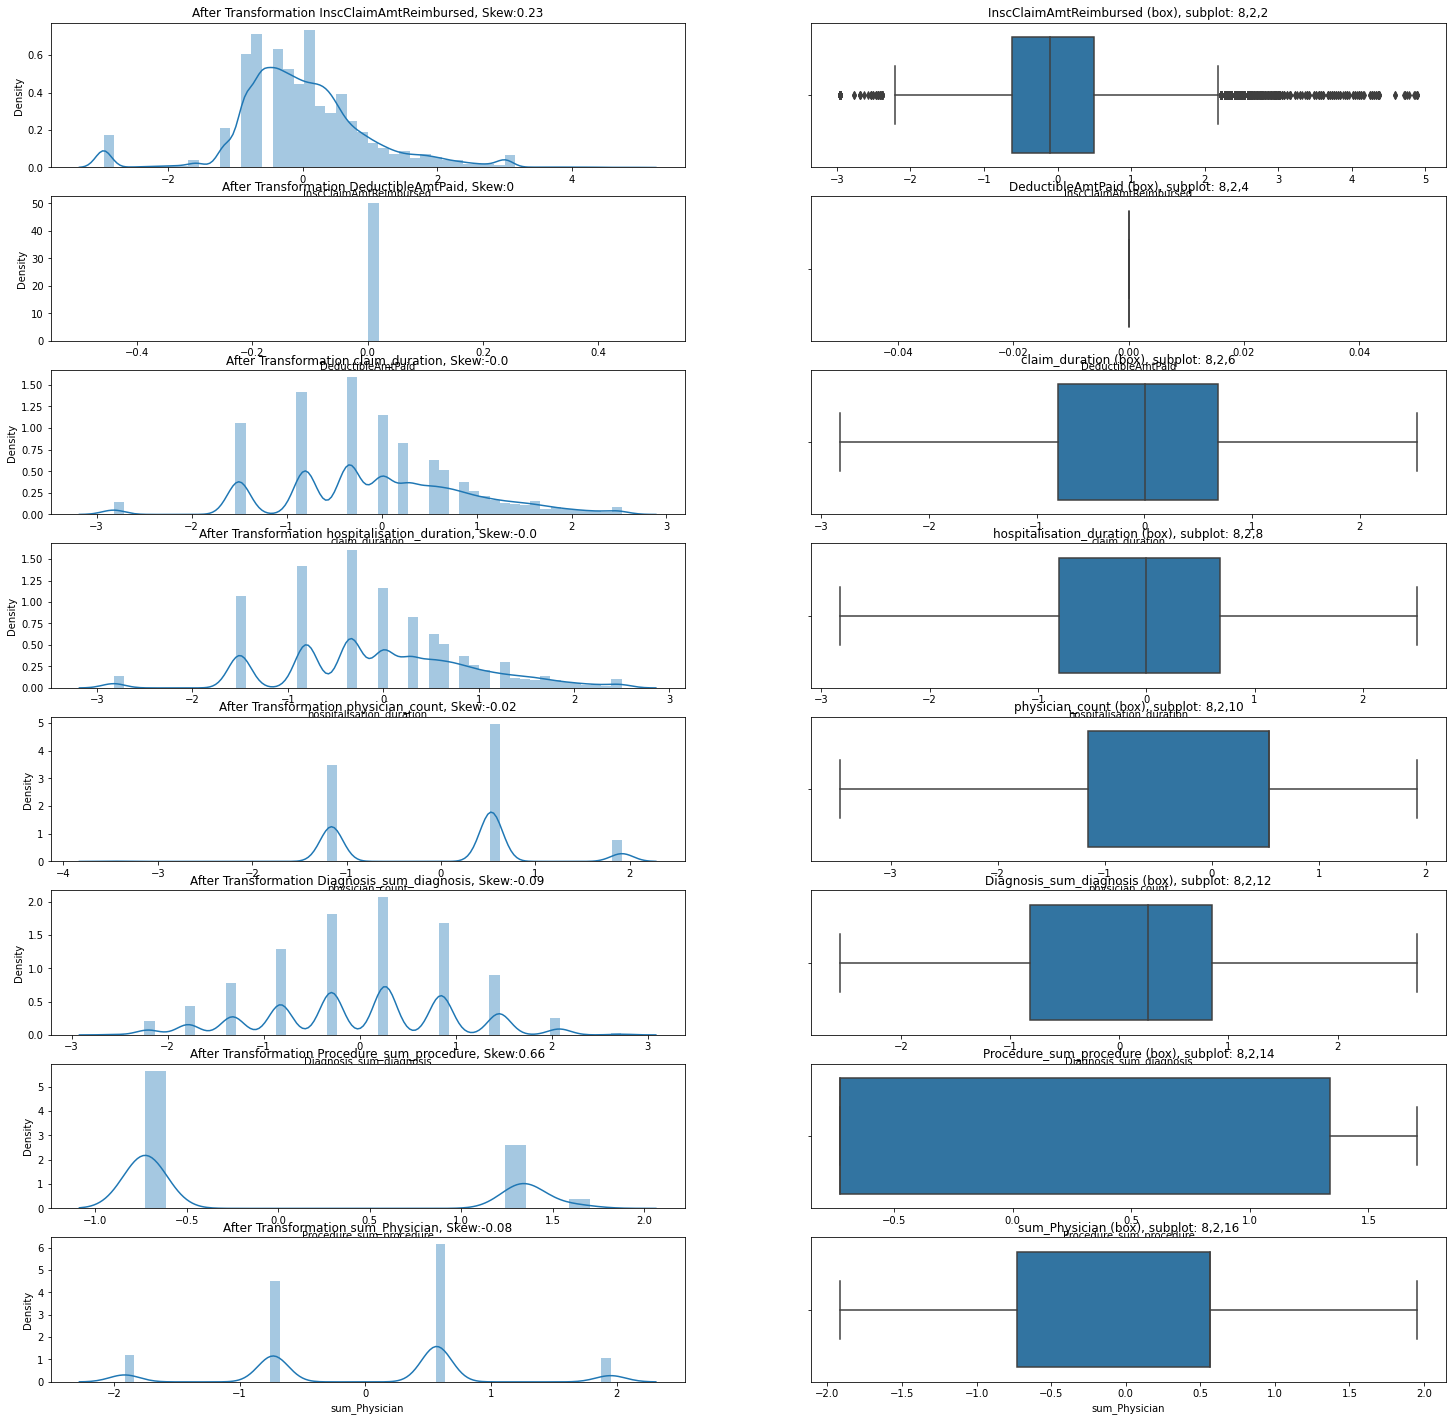

In [41]:
# df_num = np.log(df_ben[num_cols_ben])
PT_ben = PowerTransformer(method='yeo-johnson')

dff[num_cols_ben] = PT_ben.fit_transform(dff[num_cols_ben])

fig = plt.figure(figsize=(25,25))

#  plot Numerical Data
a = len(num_cols_ben)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter


for i in num_cols_ben:
    plt.subplot(a, b, c)
    skew = round(dff[i].skew(),2)
    plt.title('After Transformation {}, Skew:{}'.format(i, skew))
    plt.xlabel(i)
    sns.distplot(dff[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x = dff[i])
    c = c + 1

In [44]:
PT_ben = PowerTransformer(method='yeo-johnson')

inpatient_onehot[["InscClaimAmtReimbursed","DeductibleAmtPaid","claim_duration","hospitalisation_duration","physician_count","Diagnosis_sum_diagnosis", "Procedure_sum_procedure", "sum_Physician"]] = PT_ben.fit_transform(inpatient_onehot[["InscClaimAmtReimbursed","DeductibleAmtPaid","claim_duration","hospitalisation_duration","physician_count","Diagnosis_sum_diagnosis", "Procedure_sum_procedure", "sum_Physician"]])

C:\Users\MR321NC\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [45]:
inpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_4280,Diagnosis_41401,Diagnosis_41400,Diagnosis_486,Diagnosis_2948,Diagnosis_71590,Diagnosis_5859,Diagnosis_3051,Diagnosis_2859,Diagnosis_25000,Diagnosis_27651,Diagnosis_5990,Diagnosis_311,Diagnosis_5849,Diagnosis_2449,Diagnosis_2768,Diagnosis_496,Diagnosis_2761,Diagnosis_42731,Diagnosis_40390,Diagnosis_49121,Diagnosis_4019,Diagnosis_2724,Diagnosis_53081,Diagnosis_2720,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY338562,PHY353156,PHY429938,PHY339670,PHY362864,PHY361948,PHY429828,PHY411541,PHY404394,PHY423877,PHY341560,PHY430367,PHY315112,PHY396496,PHY376882,PHY376288,PHY429430,PHY385561,PHY399458,PHY314410,PHY412508,PHY428454,PHY400274,PHY332294,PHY431177,PHY422134,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,BENE11001,PRV55912,1.580334,0.0,0.495000,0.494369,1,0,0,-1.159907,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,-0.823387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
CLM66048,BENE11001,PRV55907,-0.428070,0.0,-0.805205,-0.805652,1,1,0,0.531912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.784958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM68358,BENE11001,PRV56046,-0.428070,0.0,-0.340828,-0.341280,1,0,1,0.531912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM38412,BENE11011,PRV52405,-0.428070,0.0,0.843234,0.842460,1,1,1,1.916048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.951322
CLM63689,BENE11014,PRV56614,0.282015,0.0,1.724239,1.722905,1,1,0,0.531912,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM69886,BENE159167,PRV53671,-0.104236,0.0,0.002810,0.002311,1,1,0,0.531912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.726416,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM74504,BENE159175,PRV54981,-0.623273,0.0,-0.340828,-0.341280,1,1,0,0.531912,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM76485,BENE159177,PRV56588,-0.854027,0.0,0.002810,0.002311,1,1,0,0.531912,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,-0.823387,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678


In [46]:
inpatient_onehot.to_csv("../Processed/vivek/inpatient_cleaned&transformed.csv")

In [ ]:
len( df_inpatient.merge(df_train_flagged, on="Provider", how="inner"))

In [ ]:
df_inpatient_flaged = df_inpatient.merge(df_train_flagged, on="Provider", how="inner")

In [ ]:
df_inpatient_flaged = df_inpatient_flaged.set_index("ClaimID")

In [ ]:
ClmDiagnosisCode_onehot_flagged_yes = pd.merge(df_inpatient_flaged[df_inpatient_flaged["PotentialFraud"]=="Yes"]["PotentialFraud"], ClmDiagnosisCode_onehot_full, left_index=True, right_index=True)

In [ ]:
ClmDiagnosisCode_onehot_flagged_yes = ClmDiagnosisCode_onehot_flagged_yes.drop("PotentialFraud",axis=1)

In [ ]:
ClmDiagnosisCode_onehot_flagged_yes_axis_sum = pd.DataFrame(ClmDiagnosisCode_onehot_flagged_yes.sum(axis=0).sort_values(ascending=False))

In [ ]:
ClmDiagnosisCode_onehot_full_axis_sum.head(25).plot.bar()

In [ ]:
list_of_top25_ClmDiagnosisCode_flaged = ClmDiagnosisCode_onehot_flagged_yes_axis_sum.index.values.tolist()[:25]
list_of_other_ClmDiagnosisCode = ClmDiagnosisCode_onehot_flagged_yes_axis_sum.index.values.tolist()[25:]
ClmDiagnosisCode_onehot_flagged = ClmDiagnosisCode_onehot_flagged_yes[list_of_top25_ClmDiagnosisCode]
sum_of_other_ClmDiagnosis = ClmDiagnosisCode_onehot_flagged_yes[list_of_other_ClmDiagnosisCode].sum(axis=1)
ClmDiagnosisCode_onehot_flagged['sum_diagnosis_flaged'] = sum_of_other_ClmDiagnosis

In [ ]:
ClmDiagnosisCode_onehot_flagged

In [ ]:
df_inpatient_flaged.merge()

In [ ]:
df_inpatient_flaged[df_inpatient_flaged["PotentialFraud"]=="Yes"]

In [ ]:
ClmDiagnosisCode_onehot

In [ ]:
sum_of_other_ClmDiagnosis

In [ ]:
ClmProcedureCode_1 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_1'])
ClmProcedureCode_2 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_2'])
ClmProcedureCode_3 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_3'])
ClmProcedureCode_4 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_4'])
ClmProcedureCode_5 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_5'])
ClmProcedureCode_6 = pd.get_dummies(ClmProcedureCode['ClmProcedureCode_6'])

In [ ]:
ClmProcedureCode_list = [ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6]

In [ ]:
onehot_full_ClmProcedureCode = pd.DataFrame()
for file in ClmProcedureCode_list:
    column_list = file.columns.values.tolist()
    onehot_full_columns = onehot_full_ClmProcedureCode.columns.values.tolist()
    for column in column_list:
        if column in onehot_full_columns:
            onehot_full_ClmProcedureCode[column] = onehot_full_ClmProcedureCode[column]+file[column]
        else:
            onehot_full_ClmProcedureCode[column] = file[column]

In [ ]:
onehot_full_ClmProcedureCode.head()

In [ ]:
onehot_full_ClmProcedureCode.shape

In [ ]:
ClmProcedureCode= ClmProcedureCode.head(25)

In [ ]:
ClmProcedureCode = ClmProcedureCode.fillna(0)

In [ ]:
ClmProcedureCode[['ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']]

In [ ]:
ClmProcedureCode.dtypes

In [ ]:
#put ClaimID to index
ClmProcedureCode.set_index('ClaimID', inplace= True)

In [ ]:
ClmProcedureCode.head()

In [ ]:
ClmProcedureCode = ClmProcedureCode.astype(int)

In [ ]:
ClmProcedureCode.dtypes

In [ ]:
#check percentage of missing values
ClmProcedureCode.isnull().sum()*100/len(ClmDiagnosisCode)

In [ ]:
#creating list of list of fiagnosis code
ClmProcedureCode_list = []
for i in range(len(ClmProcedureCode)):
  ClmProcedureCode_list.append([str(ClmProcedureCode.values[i,j]) for j in range(0, 6)])

In [ ]:
ClmProcedureCode_list

In [ ]:
#flatening the list
ClmProcedure_list = []
for sublist in ClmProcedureCode_list:
    for item in sublist:
        ClmProcedure_list.append(item)

In [ ]:
ClmProcedure_list

In [ ]:
#checking the length
len(ClmProcedure_list)

In [ ]:
# to remove duplicated diganosis codes
unique_ClmProcedurecode = list(set(ClmProcedure_list))

In [ ]:
len(unique_ClmProcedurecode)

In [ ]:
unique_ClmProcedurecode

In [ ]:
## creating a zero dataframe
import numpy as np
final_ClmProcedureCode_data = pd.DataFrame(0, index=np.arange(len(ClmProcedureCode)), columns=unique_ClmProcedurecode)

In [ ]:
final_ClmProcedureCode_data.head()

In [ ]:
final_ClmProcedureCode_data.shape

In [ ]:
ClmProcedureCode_len = ClmProcedureCode.shape[0]
ClmProcedureCode_column_len = ClmProcedureCode.shape[1]

##one hot encoding
for i in range(ClmProcedureCode_len):
    for j in range (ClmProcedureCode_column_len):
        for unique_code in unique_ClmProcedurecode:
            if ClmProcedureCode.iloc[i,j] == unique_code:
                final_ClmProcedureCode_data.at[i,unique_code] = 1

In [ ]:
ClmProcedureCode.shape[1]

In [ ]:
final_ClmProcedureCode_data.head(25)

In [ ]:
final_diganosis_data.to_csv("final_diganosis_data_onehotencoded.csv", index=False)

In [ ]:
final_diganosis_data = pd.read_csv("../Processed/final_diganosis_data_onehotencoded.csv")

In [ ]:
final_diganosis_data.shape

In [ ]:
diganosis_distribution = pd.DataFrame(final_diganosis_data.sum(axis=0).sort_values(ascending=False))

In [ ]:
diganosis_distribution.head(10).plot.bar()

In [ ]:
diganosis_distribution.iloc[:,0].sum()

In [ ]:
df_inpatient = df_inpatient[['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode']]
top_10_onehotencoded_data_diagnosis = final_diganosis_data[['4019','2724','25000','41401','4280','42731','5990','53081','2449','5849']]

In [ ]:
pd.merge(df_inpatient, top_10_onehotencoded_data_diagnosis, left_index=True, right_index=True)

In [ ]:
ClmDiagnosisCode_len = ClmDiagnosisCode.shape[0]
print(ClmDiagnosisCode_len)

In [ ]:
##one hot encoding
for i in range(ClmDiagnosisCode_len):
    for j in range (ClmDiagnosisCode_column_len):
        print(ClmDiagnosisCode_len[i,j])

In [ ]:
final_diganosis_data.loc[1,7399] = final_diganosis_data.loc[1,7399] = final_diganosis_data.loc[1,7399].astype(str).replace(0,1,regex=True)

In [ ]:
final_diganosis_data.head()